# Data Processing Module

## 0. Downloading Dataset

In this project, we use `Vietnamese car price` dataset, which contains information of 30.7k used car on a Vietnamese online market at the beginning of 2023

In [1]:
# Download Dataset using gdown
# https://drive.google.com/file/d/1uhhpMRqBVTTG5AYdddhYjvj26lVYnExL/view?usp=sharing
!pip install gdown==4.6.0 -q
!gdown 1uhhpMRqBVTTG5AYdddhYjvj26lVYnExL

Downloading...
From: https://drive.google.com/uc?id=1uhhpMRqBVTTG5AYdddhYjvj26lVYnExL
To: /content/vietnamese_car_price.zip
100% 12.2M/12.2M [00:00<00:00, 34.5MB/s]


In [2]:
# Unzip dataset
!unzip -qq -a vietnamese_car_price.zip

## 1. Import Libraries

In [3]:
# Import necessary libraries
import numpy as np # Import NumPy for numerical computations and data manipulation

import pandas as pd  # Import Pandas for data manipulation and analysis
pd.set_option('display.max_rows', 1000) # Set Pandas options to display a maximum of 1000 rows

import re # Import re for working with text and regular expressions

# Import warnings to ignore error
import warnings
warnings.filterwarnings("ignore")

# Import matplotlib and seaborn for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Set up matplotlib style
plt.style.available # Show list of available styles
plt.style.use('seaborn-v0_8-bright')

# Import LabelEncoder from sklearn.preprocessing for encoding categorical features
from sklearn.preprocessing import LabelEncoder

# Import StandardScaler from sklearn.preprocessing for normalization data
from sklearn.preprocessing import StandardScaler

## 2. Loading Dataset

In [202]:
# Loading dataset
car_details = pd.read_csv('car_detail_en.csv')
# Rename columns
car_details.rename(columns={'price. price': 'price',
                            'car_model': 'car_type'},
                   inplace=True)

# Check for dupication
item0 = car_details.shape[0]  # Stores the initial number of rows in the DataFrame
car_details = car_details.drop_duplicates()  # Removes duplicate rows from the DataFrame
item1 = car_details.shape[0]  # Stores the number of rows after removing duplicates
print(f"There are {item0-item1} duplicates found in the dataset")  # Prints the number of duplicates that were removed

There are 0 duplicates found in the dataset


In [203]:
car_details.head().T

,0,1,2,3,4
ad_id,17042,53794,73954,74150,87573
origin,Domestic assembly,Imported,Domestic assembly,Imported,Domestic assembly
condition,New car,New car,New car,New car,New car
car_type,Truck,SUV,Crossover,SUV,Crossover
mileage,0 Km,0 Km,0 Km,0 Km,0 Km
exterior_color,White,Black,Silver,White,Silver
interior_color,gray,Black,Brown,Black,gray
num_of_doors,2-door,5-door,5-door,5-door,5-door
seating_capacity,2-seat,7-seat,8-seat,5-seat,8-seat
engine,Petrol\t1.0 L,Petrol\t3.4 L,Petrol\t2.0 L,Petrol\t1.8 L,Petrol\t2.0 L


## 3. Data Preprocessing

### Convert `price` and `mileage` to numerical

In [204]:
# Before processing
car_details[["price", "mileage"]].head()

,price,mileage
0,249 Million,0 Km
1,4 Billion 286 Million,0 Km
2,885 Million,0 Km
3,754 Million,0 Km
4,850 Million,0 Km


In [205]:
# Function to convert price to numerical
def price_to_numeric(price):
    try:
        if "Billion" in price and not "Million" in price:
            return float(price.replace("Billion", "").replace(" ", ""))*1000
        elif "Million" in price and not "Billion" in price:
            return float(price.replace("Million", "").replace(" ", ""))
        else:
            return float(price.replace("Billion", "").replace("Million", "").replace(" ", ""))
    except:
        return None
# Apply function to convert price to numerical
car_details['price'] = car_details['price'].apply(price_to_numeric)
# Drop missing data
car_details = car_details[~car_details['price'].isnull()]


# Function to convert mileage to numerical
def mileage_to_numeric(mileage):
    try:
        return float(mileage.rstrip(' Km').replace(" ", '').replace(',',''))
    except:
        return None
# Apply function to convert mileage to numerical
car_details['mileage'] = car_details['mileage'].apply(mileage_to_numeric)

# Standardization
car_details['log10_price'] = np.log10(car_details['price'])
car_details['log10_mileage'] = np.log10(car_details['mileage']+1) # +1 to avoid Zero Devision Error

In [206]:
# After Processing result
car_details[["price", 'mileage', 'log10_price', 'log10_mileage']].head()

,price,mileage,log10_price,log10_mileage
0,249.0,0.0,2.396199,0.0
1,4286.0,0.0,3.632052,0.0
2,885.0,0.0,2.946943,0.0
3,754.0,0.0,2.877371,0.0
4,850.0,0.0,2.929419,0.0


### Get `engine` specifications

In [207]:
# Before Processing
car_details[["engine", "fuel_consumption"]].head()

,engine,fuel_consumption
0,Petrol\t1.0 L,L/100Km
1,Petrol\t3.4 L,10\tL/100Km
2,Petrol\t2.0 L,L/100Km
3,Petrol\t1.8 L,L/100Km
4,Petrol\t2.0 L,L/100Km


In [208]:
# Get fuel-type
car_details['fuel_type'] = car_details['engine'].apply(lambda engine: str(engine).split('\t')[0])

# Define a function to get engine size
def get_engine_type(engine):
    result = str(engine).split('\t')[-1]
    if "L" in result:
        result = float(result.replace("L", "").replace(" ", ""))
        return result
    else:
        return None
# Get engine size
car_details['engine_size'] = car_details['engine'].apply(get_engine_type)

# Define a function to get fuel consumptions
def get_fuel_consumption(fuel_consumption):
    result = str(fuel_consumption).replace("L/100Km", "").rstrip("\t").replace(',','').strip() # Remove non-numeric charater
    pattern = r'[A-Za-z]'
    result = re.sub(pattern,'', result)  # Remove non-numeric charaters
    if result:
        return float(result)
    else:
        return None
# Get fuel consumptions
car_details['fuel_consumption'] = car_details['fuel_consumption'].apply(get_fuel_consumption)

In [209]:
# After Processing
car_details[["engine", "fuel_type", "engine_size", "fuel_consumption"]].head()

,engine,fuel_type,engine_size,fuel_consumption
0,Petrol\t1.0 L,Petrol,1.0,NaN
1,Petrol\t3.4 L,Petrol,3.4,10.0
2,Petrol\t2.0 L,Petrol,2.0,NaN
3,Petrol\t1.8 L,Petrol,1.8,NaN
4,Petrol\t2.0 L,Petrol,2.0,NaN


### Get `car_model`

In [210]:
# Before Processing
car_details[["brand", "grade", "car_name"]].head()

,brand,grade,car_name
0,Suzuki,Super Carry Truck,Suzuki Super Carry Truck 1.0 MT 2022
1,Toyota,Land Cruiser,Toyota Land Cruiser 3.5 V6 2022
2,Toyota,Innova,Toyota Innova G 2.0 AT 2023 car
3,Toyota,Corolla Cross,Toyota Corolla Cross 1.8G 2023
4,Toyota,Innova,Toyota Innova G 2.0 AT 2022 car


In [211]:
# Combine brand and grade
car_details['brand_grade'] = car_details['brand'] + ' ' + car_details['grade']

# Define a function to get car model
def get_car_model(data_row):
    substring = data_row['brand_grade'] + ' '
    if substring in data_row['car_model']:
        data_row['car_model'] = data_row['car_model'].replace(substring, '')
        return data_row
    else:
        return data_row

# Get car model
car_details['car_model'] = car_details['car_name']
car_details = car_details.apply(get_car_model, axis=1)

In [212]:
# Before Processing
car_details[["brand", "grade", "car_name", "brand_grade", "car_model"]].sample(5)

,brand,grade,car_name,brand_grade,car_model
29854,Daewoo,Lacetti,Daewoo Lacetti CDX 1.6 AT 2010,Daewoo Lacetti,CDX 1.6 AT 2010
24134,Ford,Transit,Ford Transit Luxury 2016,Ford Transit,Luxury 2016
455,Toyota,Yaris,Toyota Yaris G 1.5 AT 2022,Toyota Yaris,G 1.5 AT 2022
29414,Toyota,Vios,Toyota Vios 2015,Toyota Vios,2015
2824,Lexus,RX,Lexus RX 350 2021,Lexus RX,350 2021


### Get car specifications

In [213]:
# Before Processing
car_details[["num_of_doors", 'seating_capacity']].head()

,num_of_doors,seating_capacity
0,2-door,2-seat
1,5-door,7-seat
2,5-door,8-seat
3,5-door,5-seat
4,5-door,8-seat


In [214]:
# Define a function to get number of doors
def get_num_of_doors(num_of_doors):
    result = int(str(num_of_doors).split('-')[0])
    return result
# Get number of doors
car_details['num_of_doors'] = car_details['num_of_doors'].apply(get_num_of_doors)

# Define a function to get seating_capacity
def get_seating_capacity(seating_capacity):
    result = int(str(seating_capacity).split('-')[0])
    return result
# Get seating_capacity
car_details['seating_capacity'] = car_details['seating_capacity'].apply(get_seating_capacity) # Get seating_capacity

In [215]:
# After Processing result
car_details[["num_of_doors", 'seating_capacity']].head()

,num_of_doors,seating_capacity
0,2,2
1,5,7
2,5,8
3,5,5
4,5,8


### Get `seller_address`

In [216]:
# Load sellers dataset
sellers = pd.read_csv("seller.csv")

# Rename Columns
sellers.rename(columns = {"Mã tin": 'ad_id',
                          "Địa chỉ": "seller_address"}, inplace=True)

# Select only specific columns of interest
sellers = sellers[['ad_id', 'seller_address']]

# Get city name from address
def get_city_name(address):
  # Remove duplicate space in string
  pattern = ' +' # More than 1 space continuously
  address = re.sub(pattern, ' ', address)
  # Check if 2-3 last word are city name
  if ' '.join(address.strip(' ').split(' ')[-2:]) == 'Thiên Huế':
    return ' '.join(address.strip(' ').split(' ')[-3:])
  else:
    return ' '.join(address.strip(' ').split(' ')[-2:])

sellers['seller_address'] = sellers['seller_address'].apply(get_city_name)

# Merge car_details with sellers
car_details = pd.merge(car_details, sellers, on="ad_id", how="left")
car_details.drop(columns=['ad_id'], inplace=True)

In [217]:
# After Processing
car_details["seller_address"].head()

0    Hà Nội
1    Hà Nội
2    TP HCM
3    TP HCM
4    Hà Nội
Name: seller_address, dtype: object

## Descriptive Statistic Analysis

### Overview

In [218]:
car_details.describe().T

,count,mean,std,min,25%,50%,75%,max
mileage,30480.0,408916.129298,3.498746e+07,0.000000,0.000000,20000.000000,60000.000000,4.294967e+09
num_of_doors,30480.0,4.503675,9.528328e-01,0.000000,4.000000,5.000000,5.000000,5.400000e+01
seating_capacity,30480.0,5.541568,1.582796e+00,0.000000,5.000000,5.000000,7.000000,4.700000e+01
fuel_consumption,11365.0,35.751298,2.100679e+03,0.000000,6.000000,7.000000,8.000000,2.000000e+05
year_of_manufacture,30451.0,2017.356901,5.287769e+00,1990.000000,2015.000000,2019.000000,2022.000000,2.023000e+03
price,30480.0,1122.879462,2.059597e+03,12.000000,383.000000,589.000000,920.000000,5.400000e+04
log10_price,30480.0,2.804430,4.137314e-01,1.079181,2.583199,2.770115,2.963788,4.732394e+00
log10_mileage,30480.0,2.999295,2.219842e+00,0.000000,0.000000,4.301052,4.778158,9.632960e+00
engine_size,29129.0,2.047245,8.162916e-01,0.100000,1.500000,2.000000,2.400000,1.270000e+01


### Check For Abnormal Data

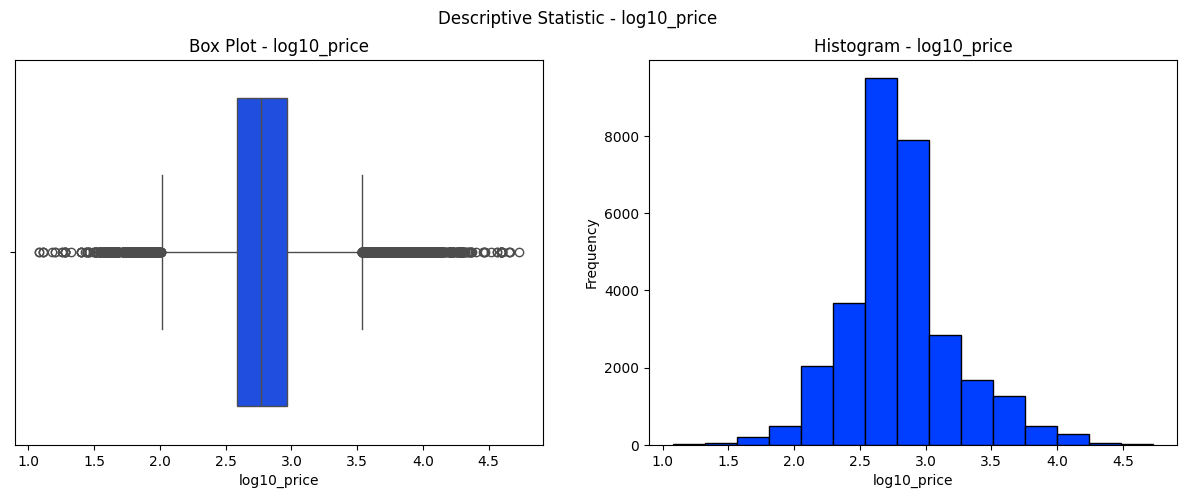

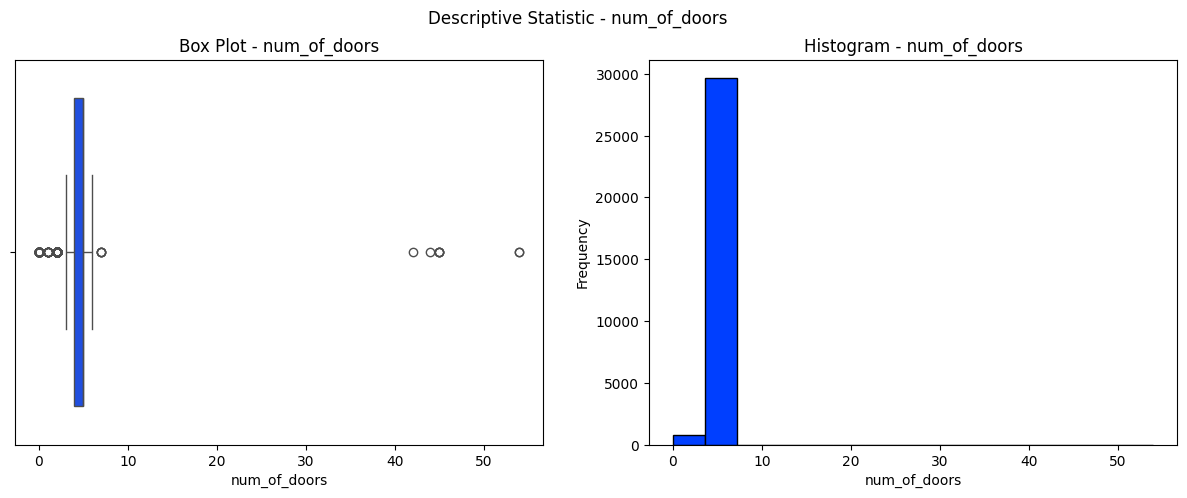

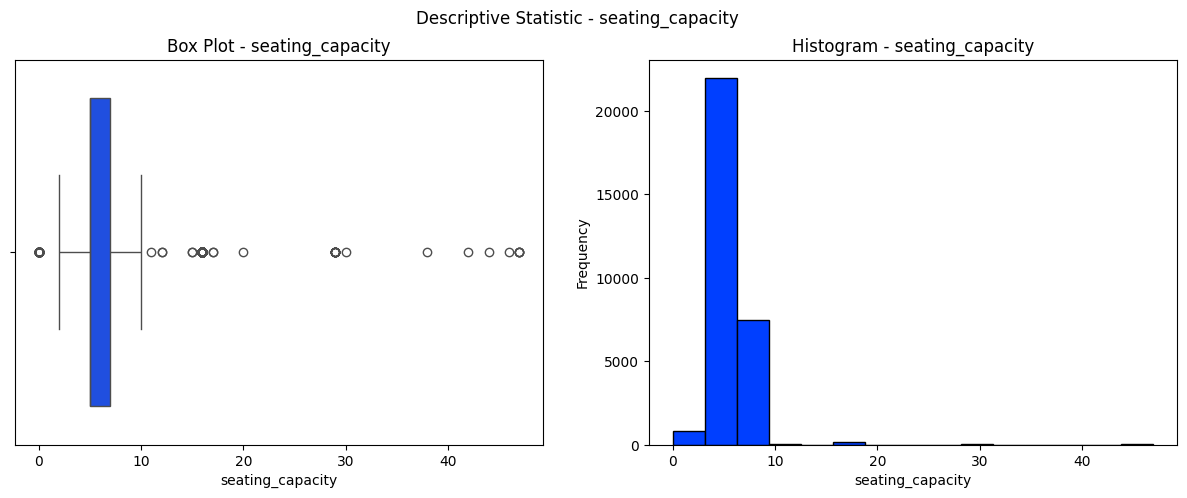

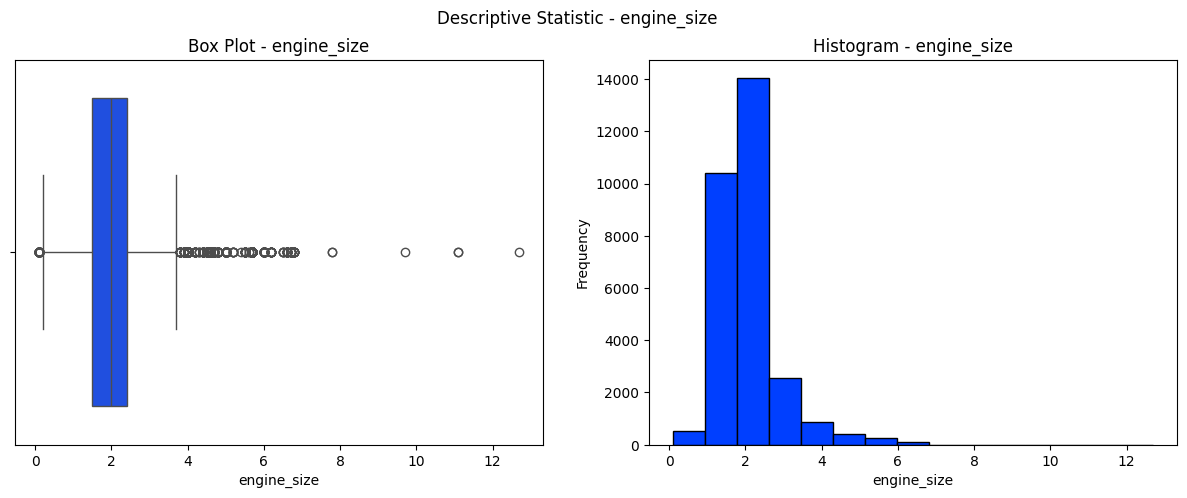

In [219]:
# Visualize distribution of numeric data
for col in ['log10_price', 'num_of_doors',
            'seating_capacity', 'engine_size']:
    # Initialize figure
    plt.figure(figsize=(15,5))
    plt.suptitle(f'Descriptive Statistic - {col}')
    # Subplot 1 - Box plot
    plt.subplot(121)
    sns.boxplot(x=col, data=car_details)
    plt.title(f'Box Plot - {col}')
    # Subplot 2 - Histogram
    plt.subplot(122)
    car_details[col].plot(kind='hist', bins=15, edgecolor='black')
    plt.xlabel(col)
    plt.title(f'Histogram - {col}')
    # Show plots
    plt.show()

#### Number of doors and seating capacity

In [220]:
##########################
#  Remove abnormal data  #
##########################

# num_of_doors
item0 = car_details.shape[0] # Stores the initial number of rows in the DataFrame
car_details = car_details[car_details['num_of_doors']<=7.0] # Number of doors must lower than 7
car_details = car_details[car_details['num_of_doors']> 0] # Number of doors must greater than 0
item1 = car_details.shape[0] # Stores the number of rows after removing abnormal data
print(f"There are {item0-item1} abnormal data of num_of_doors found in the dataset")

# seating_capacity
item0 = car_details.shape[0]  # Stores the initial number of rows in the DataFrame
car_details = car_details[car_details['seating_capacity']>0] # Seating capacity must greater than 0
item1 = car_details.shape[0]  # Stores the number of rows after removing abnormal data
print(f"There are {item0-item1} abnormal data of seating_capacity found in the dataset")

There are 77 abnormal data of num_of_doors found in the dataset
There are 7 abnormal data of seating_capacity found in the dataset


#### Fuel Consumption

##### Descriptive Statistic

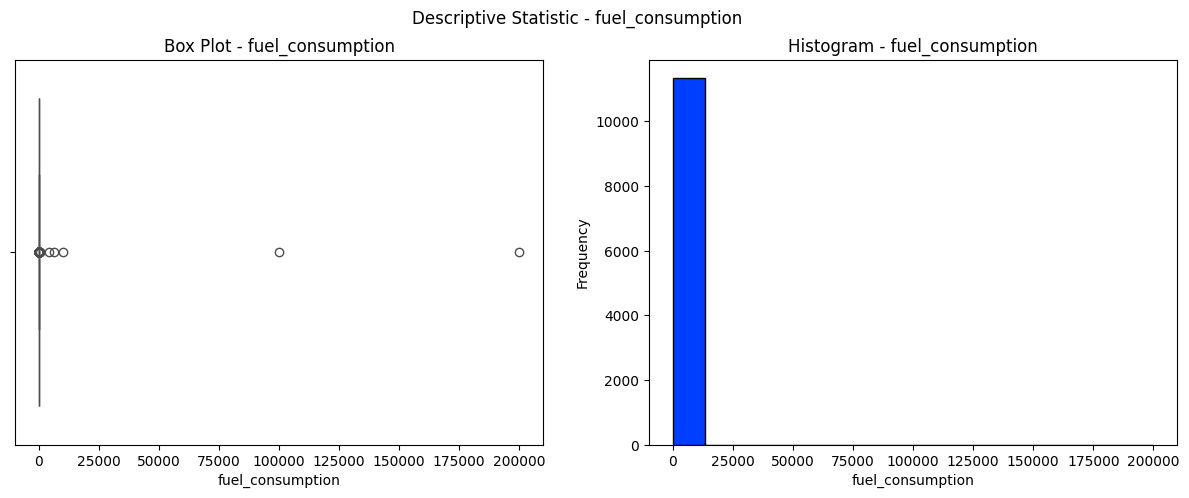

In [221]:
# Visualize distribution of fuel_consumption
# Initialize figure
plt.figure(figsize=(15,5))
plt.suptitle(f'Descriptive Statistic - fuel_consumption')
# Subplot 1 - Box plot
plt.subplot(121)
sns.boxplot(x='fuel_consumption', data=car_details)
plt.title(f'Box Plot - fuel_consumption')

# Subplot 2 - Histogram
plt.subplot(122)
car_details['fuel_consumption'].plot(kind='hist', bins=15, edgecolor='black')
plt.xlabel('fuel_consumption')
plt.title(f'Histogram - fuel_consumption')
# Show plots
plt.show()

##### Remove abnormal data

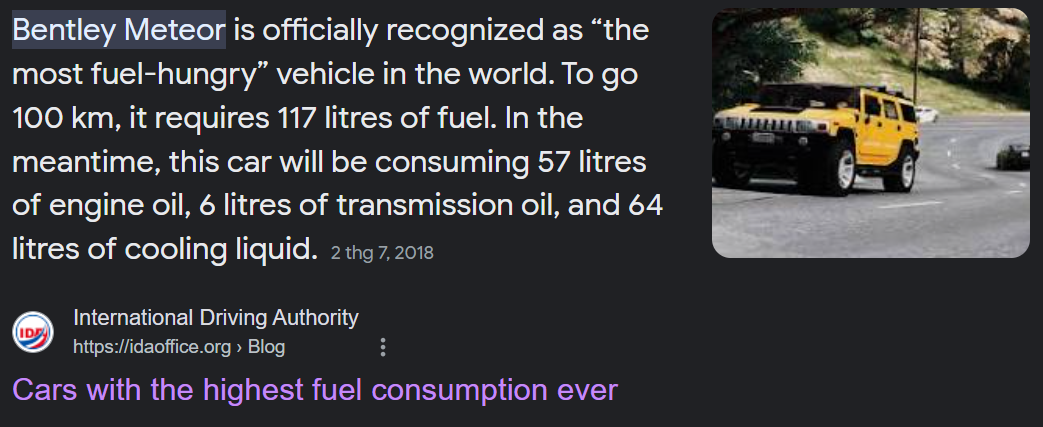

In [222]:
# fuel_consumption
item0 = car_details.shape[0]  # Stores the initial number of rows in the DataFrame
car_details['fuel_consumption'].fillna(0, inplace=True)  # Fills the missing values in the 'fuel_consumption' column with 0
car_details = car_details[car_details['fuel_consumption']<100]
car_details['fuel_consumption'].apply(lambda x: None if x == 0 else x)
item1 = car_details.shape[0]  # Stores the number of rows after removing abnormal data
print(f"There are {item0-item1} abnormal data of fuel_consumption found in the dataset")

There are 18 abnormal data of fuel_consumption found in the dataset


##### Result

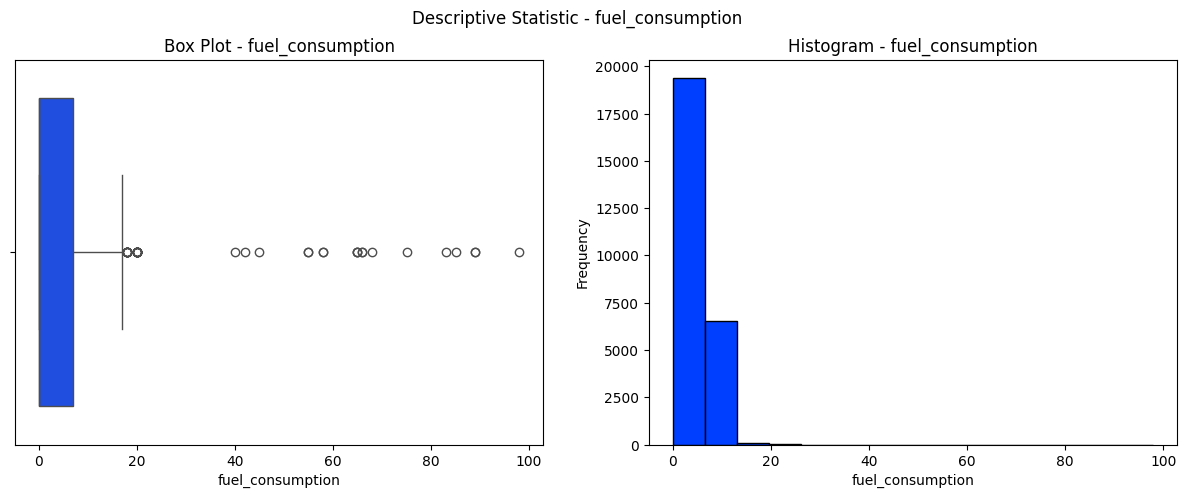

In [227]:
# Visualize distribution of fuel_consumption
# Initialize figure
plt.figure(figsize=(15,5))
plt.suptitle(f'Descriptive Statistic - fuel_consumption')
# Subplot 1 - Box plot
plt.subplot(121)
sns.boxplot(x='fuel_consumption', data=car_details)
plt.title(f'Box Plot - fuel_consumption')

# Subplot 2 - Histogram
plt.subplot(122)
car_details['fuel_consumption'].plot(kind='hist', bins=15, edgecolor='black')
plt.xlabel('fuel_consumption')
plt.title(f'Histogram - fuel_consumption')
# Show plots
plt.show()

#### Mileage

##### Descriptive Statistic

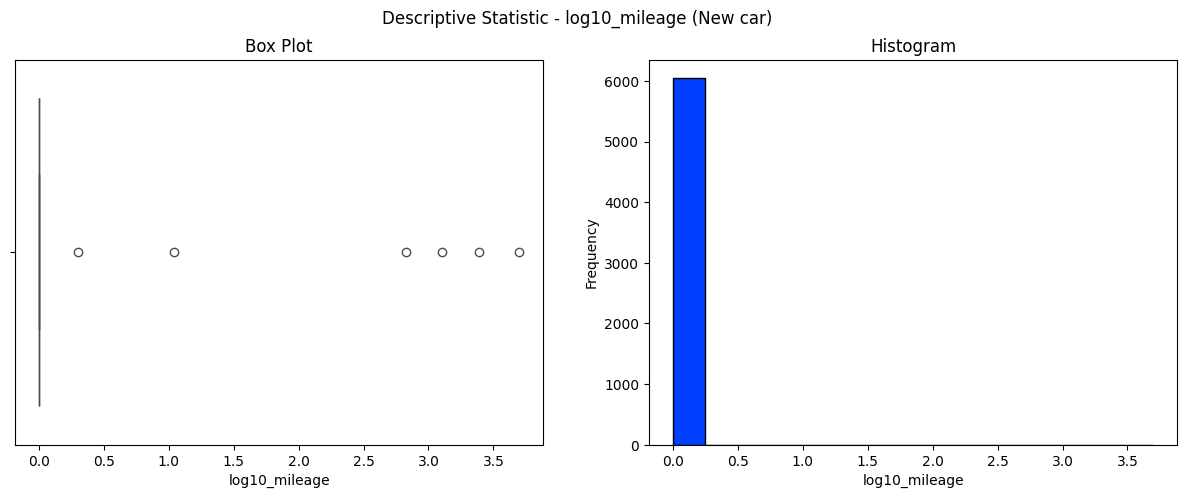

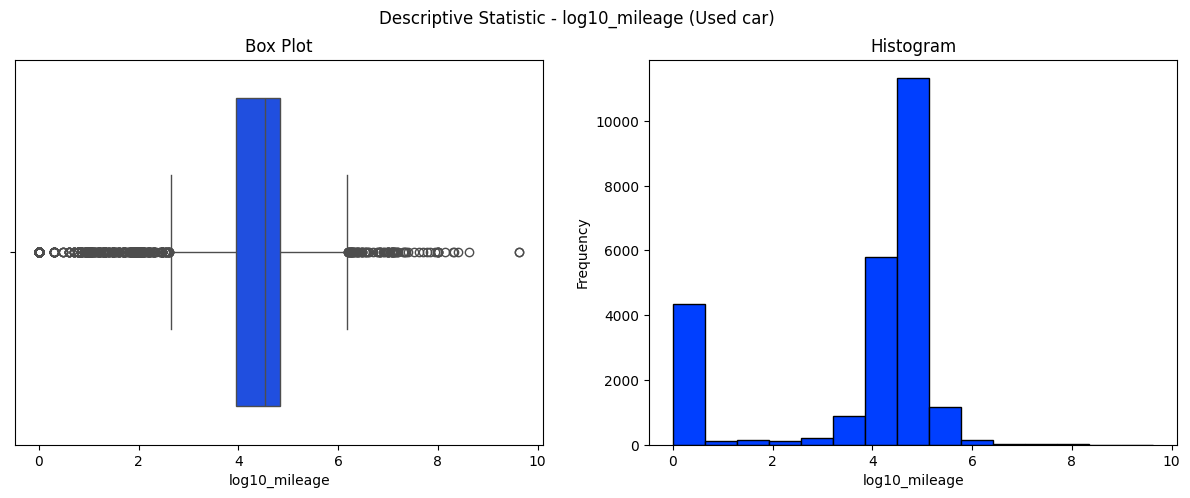

In [223]:
# Descriptive Statistic Analysis
for condition in ["New car", "Used car"]:
    plt.figure(figsize=(15,5))
    plt.suptitle(f'Descriptive Statistic - log10_mileage ({condition})')
    # Subplot 1
    plt.subplot(121)
    sns.boxplot(x='log10_mileage',
                data=car_details[car_details['condition']==condition])
    plt.title('Box Plot')
    # Subplot 2
    plt.subplot(122)
    car_details[car_details['condition']==condition]['log10_mileage'] \
                .plot(kind='hist', bins=15, edgecolor='black')
    plt.xlabel('log10_mileage')
    plt.title('Histogram')
    plt.show()

> As show in plot, there are abnormal data in in dataset:
>- New car but mileage is greater than 0.
>- Used car but mileage is 0.

##### Remove abnormal values

In [224]:
# Define a function to remove abnormal mileage values
def handling_abnormal_mileage(row):
    """
    Function to handle abnormal mileage values
    """
    if row['condition'] == 'Used car':
        if row['log10_mileage'] == 0:
          return None
        else:
          return row
    else: # If car is New car
      if row['log10_mileage'] != 0:
        return None
      else:
        return row

# Apply function to remove abnormal values
car_details = car_details.apply(handling_abnormal_mileage, axis=1)

##### Result

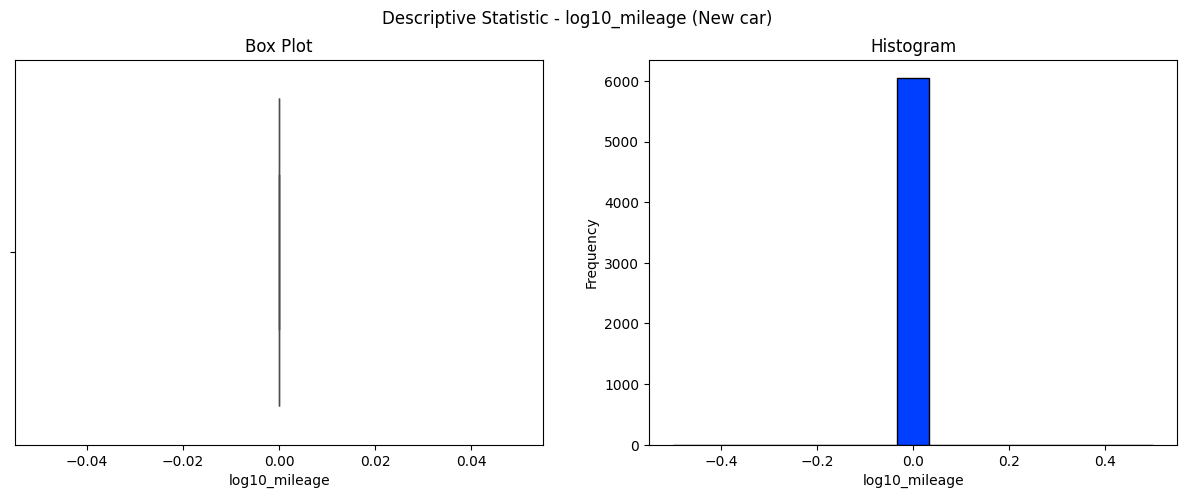

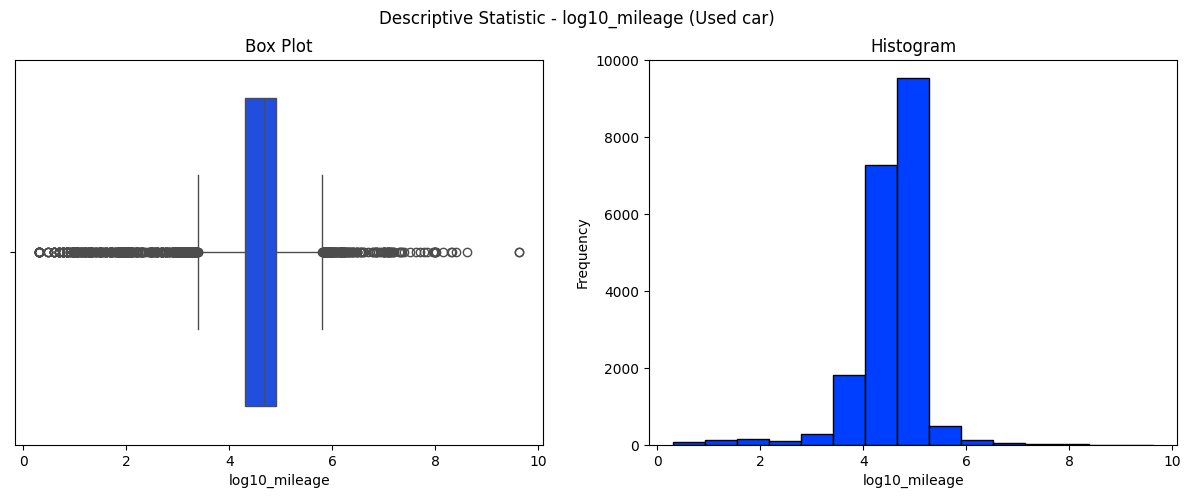

In [226]:
# Descriptive Statistic Analysis
for condition in ["New car", "Used car"]:
    plt.figure(figsize=(15,5))
    plt.suptitle(f'Descriptive Statistic - log10_mileage ({condition})')
    # Subplot 1
    plt.subplot(121)
    sns.boxplot(x='log10_mileage',
                data=car_details[car_details['condition']==condition])
    plt.title('Box Plot')
    # Subplot 2
    plt.subplot(122)
    car_details[car_details['condition']==condition]['log10_mileage'] \
                .plot(kind='hist', bins=15, edgecolor='black')
    plt.xlabel('log10_mileage')
    plt.title('Histogram')
    plt.show()

## Feature Engineering

In [181]:
# Select only specific columns of interest
selected_cols = ['log10_price', 'brand', 'grade', 'brand_grade', 'car_name',
                 'car_model', 'car_type', 'origin', 'condition', 'log10_mileage',
                 'exterior_color', 'interior_color', 'num_of_doors', 'seating_capacity',
                 'fuel_type', 'engine_size', 'transmission', 'drive_type',
                 'fuel_consumption', 'year_of_manufacture', 'seller_address']
stat_car_details = car_details[selected_cols]

In [182]:
# Identify categorical columns in the DataFrame 'car_details'
# These columns contain non-numeric data
categorical_cols = stat_car_details.select_dtypes(include=['object']).columns

# Identify numeric columns in the DataFrame 'car_details'
numeric_cols = stat_car_details.select_dtypes(include=['int64', 'float64']).columns

# Print the identified categorical and numeric columns
print("Categorical Columns:")
print(categorical_cols)
print("\nNumeric Columns:")
print(numeric_cols)

Categorical Columns:
Index(['brand', 'grade', 'brand_grade', 'car_name', 'car_model', 'car_type',
       'origin', 'condition', 'exterior_color', 'interior_color', 'fuel_type',
       'transmission', 'drive_type', 'seller_address'],
      dtype='object')

Numeric Columns:
Index(['log10_price', 'log10_mileage', 'num_of_doors', 'seating_capacity',
       'engine_size', 'fuel_consumption', 'year_of_manufacture'],
      dtype='object')


In [183]:
# Initialize LabelEncoder and StandardScaler instances
encoder = LabelEncoder()
scaler = StandardScaler()

In [184]:
# Encode categorical features
for col in categorical_cols:
    stat_car_details[col] = encoder.fit_transform(stat_car_details[col])

# Standarization
for col in stat_car_details.columns:
    stat_car_details[col] = scaler.fit_transform(stat_car_details[[col]])

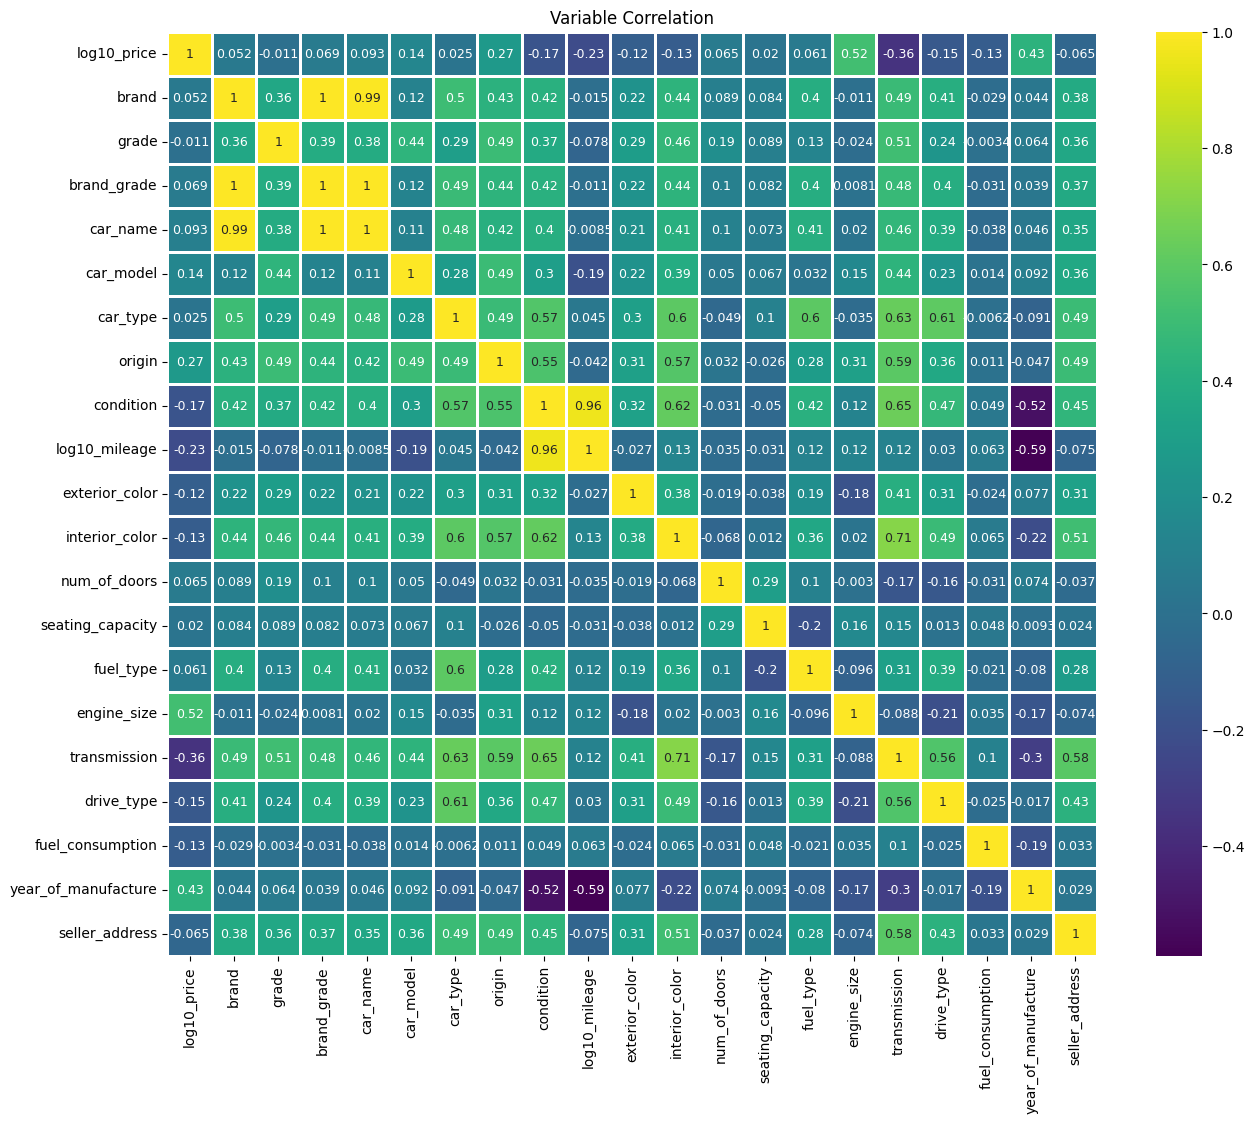

In [185]:
correlation_matrix = stat_car_details.corr()

plt.figure(figsize=(15,12))
sns.heatmap(correlation_matrix, cmap = 'viridis',linewidth = 1,annot= True, annot_kws={"size": 9})
plt.title('Variable Correlation');

In [186]:
correlation_matrix[abs(correlation_matrix['log10_price']) > 0.1]

,log10_price,brand,grade,brand_grade,car_name,car_model,car_type,origin,condition,log10_mileage,...,interior_color,num_of_doors,seating_capacity,fuel_type,engine_size,transmission,drive_type,fuel_consumption,year_of_manufacture,seller_address
log10_price,1.000000,0.052094,-0.011048,0.068718,0.092828,0.141990,0.024559,0.266008,-0.174729,-0.226060,...,-0.125920,0.065443,0.019661,0.060693,0.516597,-0.357949,-0.151914,-0.127888,0.431505,-0.064887
car_model,0.141990,0.115813,0.443385,0.123024,0.105449,1.000000,0.277305,0.493960,0.298593,-0.193415,...,0.388728,0.049897,0.067086,0.031588,0.153971,0.440036,0.225917,0.013621,0.092359,0.364208
origin,0.266008,0.425170,0.493176,0.436416,0.416070,0.493960,0.487192,1.000000,0.547590,-0.042396,...,0.571942,0.031743,-0.026052,0.281528,0.310223,0.594175,0.361400,0.011033,-0.046775,0.491375
condition,-0.174729,0.419527,0.374916,0.419782,0.404479,0.298593,0.571759,0.547590,1.000000,0.959072,...,0.618460,-0.030790,-0.050101,0.417883,0.122977,0.646329,0.471257,0.049142,-0.520575,0.451838
log10_mileage,-0.226060,-0.015153,-0.077874,-0.011311,-0.008503,-0.193415,0.044549,-0.042396,0.959072,1.000000,...,0.131463,-0.035084,-0.030945,0.115043,0.124901,0.116876,0.029642,0.063195,-0.588408,-0.074727
exterior_color,-0.116363,0.219798,0.291755,0.218262,0.206318,0.219549,0.304980,0.307316,0.317166,-0.027292,...,0.375898,-0.019054,-0.037727,0.192638,-0.180992,0.408217,0.305044,-0.023947,0.076863,0.314835
interior_color,-0.125920,0.435754,0.462017,0.435537,0.413192,0.388728,0.599316,0.571942,0.618460,0.131463,...,1.000000,-0.068273,0.011559,0.358204,0.019891,0.710481,0.487760,0.065167,-0.220628,0.512464
engine_size,0.516597,-0.010958,-0.023936,0.008143,0.020175,0.153971,-0.035415,0.310223,0.122977,0.124901,...,0.019891,-0.003042,0.156209,-0.095620,1.000000,-0.088289,-0.207278,0.035433,-0.172398,-0.073569
transmission,-0.357949,0.485676,0.511821,0.483683,0.456466,0.440036,0.630837,0.594175,0.646329,0.116876,...,0.710481,-0.166195,0.146178,0.307535,-0.088289,1.000000,0.563043,0.103468,-0.298426,0.584350
drive_type,-0.151914,0.406344,0.239748,0.399831,0.388717,0.225917,0.607641,0.361400,0.471257,0.029642,...,0.487760,-0.158783,0.012528,0.389958,-0.207278,0.563043,1.000000,-0.025219,-0.016902,0.426123


## Export Result to CSV file

In [199]:
# Select only specific columns of interest
selected_cols = ['log10_price', 'car_model', 'origin', 'condition', 'log10_mileage',
                 'exterior_color', 'interior_color', 'engine_size', 'transmission',
                 'drive_type', 'fuel_consumption', 'year_of_manufacture']
car_details = car_details[selected_cols].dropna()

# Export Report to csv
car_details.to_csv("car_details_preprocessed.csv",index=False)

In [200]:
car_details.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24999 entries, 0 to 30478
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   log10_price          24999 non-null  float64
 1   car_model            24999 non-null  object 
 2   origin               24999 non-null  object 
 3   condition            24999 non-null  object 
 4   log10_mileage        24999 non-null  float64
 5   exterior_color       24999 non-null  object 
 6   interior_color       24999 non-null  object 
 7   engine_size          24999 non-null  float64
 8   transmission         24999 non-null  object 
 9   drive_type           24999 non-null  object 
 10  fuel_consumption     24999 non-null  float64
 11  year_of_manufacture  24999 non-null  float64
dtypes: float64(5), object(7)
memory usage: 2.5+ MB
